# Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

Find the age distribution of employees in IBM

Explore attrition by age

Explore data for Left employees

Find out the distribution of employees by the education field

Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.

# Importing the Relevant libaries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [2]:
#loading dataset
df = pd.read_csv("C:\\Users\\khush\\OneDrive\\Documents\\Data Science\\1576148666_ibmattritiondata\\IBM Attrition Data.csv")

In [3]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df.columns.values

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

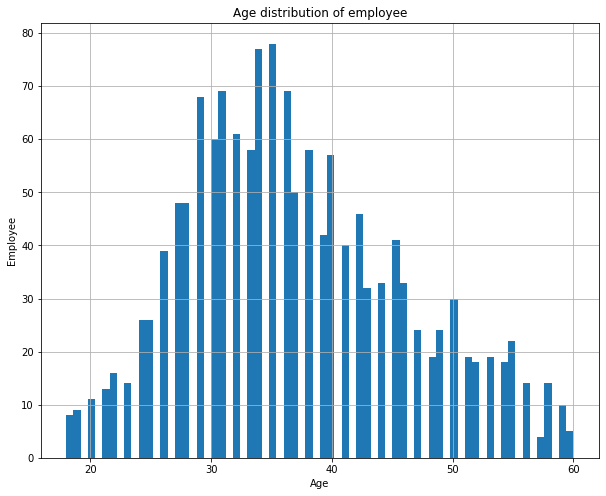

In [5]:
# Histogram for age distribution
plt.figure(figsize=(10,8))
df['Age'].hist(bins=70)
plt.title("Age distribution of employee")
plt.xlabel("Age")
plt.ylabel("Employee")
plt.show()

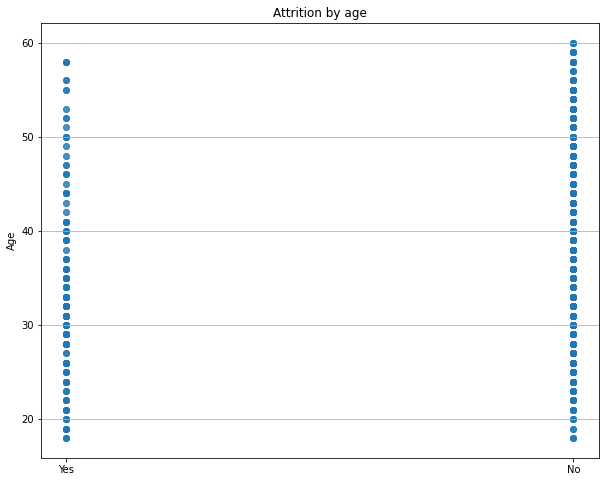

In [6]:
# Explore the dataset for attrition by age
plt.figure(figsize=(10,8))
plt.scatter(df.Attrition, df.Age, alpha=.55)
plt.title("Attrition by age")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

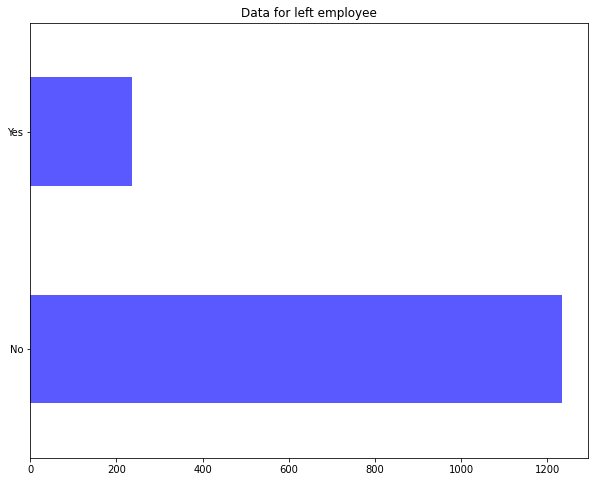

In [7]:
# Explore data for left employee
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Data for left employee")
plt.show()

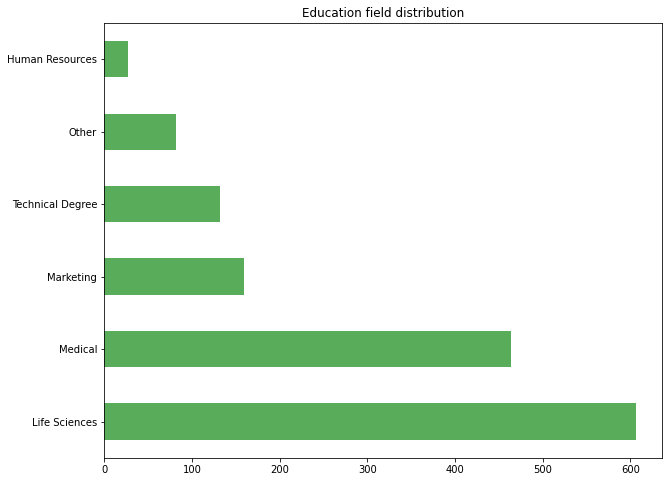

In [8]:
# Explore data for education field distribution
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind='barh',color='green',alpha=.65)
plt.title("Education field distribution")
plt.show()

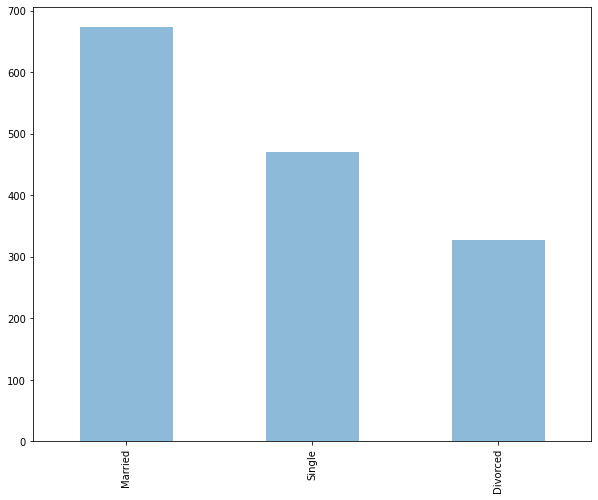

In [9]:
#Explore data for martial status
plt.figure(figsize=(10,8))
df.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

In [10]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [12]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [13]:
df.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
df['Attrition'].dtype

dtype('O')

In [16]:
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)

In [17]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


# Building a Logistic Regression Model

In [18]:
X = df.drop(['Attrition'], axis= 1)
X.head()
Y = df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [19]:
df['EducationField'].replace('Life Sciences', 1, inplace=True)
df['EducationField'].replace('Medical', 2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Technical Degree', 4, inplace=True)
df['EducationField'].replace('Human Resources', 5, inplace=True)
df['EducationField'].replace('Other', 6, inplace=True)

In [20]:
df['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [21]:
df['Department'].replace('Research & Development', 1, inplace=True)
df['Department'].replace('Sales', 2, inplace=True)
df['Department'].replace('Human Resources', 3, inplace=True)

In [22]:
df['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [23]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [24]:
df['MaritalStatus'].replace('Married', 1, inplace=True)
df['MaritalStatus'].replace('Single', 2, inplace=True)
df['MaritalStatus'].replace('Divorced', 3, inplace=True)

In [25]:
df['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [26]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,6,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [27]:
x=df.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [28]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [29]:
y = df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [30]:
from patsy import dmatrices
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [31]:
y = np.ravel(y)

In [32]:
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [33]:
y.mean()

0.16122448979591836

In [35]:
# train and test split the data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [37]:
predicted = model2.predict(X_test)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [39]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.85827842 0.14172158]
 [0.80180884 0.19819116]
 [0.74319053 0.25680947]
 [0.86595524 0.13404476]
 [0.72668152 0.27331848]
 [0.79148967 0.20851033]
 [0.85282794 0.14717206]
 [0.8578188  0.1421812 ]
 [0.96443682 0.03556318]
 [0.93460373 0.06539627]
 [0.95098163 0.04901837]
 [0.83137216 0.16862784]
 [0.85730109 0.14269891]
 [0.86098367 0.13901633]
 [0.88765044 0.11234956]
 [0.88579899 0.11420101]
 [0.88070576 0.11929424]
 [0.77728855 0.22271145]
 [0.83499724 0.16500276]
 [0.86946378 0.13053622]
 [0.69813424 0.30186576]
 [0.94698085 0.05301915]
 [0.86854212 0.13145788]
 [0.83191582 0.16808418]
 [0.60493402 0.39506598]
 [0.84006498 0.15993502]
 [0.91554835 0.08445165]
 [0.92776955 0.07223045]
 [0.67255611 0.32744389]
 [0.86899889 0.13100111]
 [0.89798926 0.10201074]
 [0.80226175 0.19773825]
 [0.86298997 0.13701003]
 [0.95775407 0.04224593]
 [0.82449951 0.17550049]
 [0.86853491 0.13146509]
 [0.90442815 0.09557185]
 [0.65612265 0.34387735]
 [0.90330665 0.09669335]
 [0.80141553 0.19858447]


In [40]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.8412698412698413
0.6539853677319984


In [45]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[371   0]
 [ 70   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [49]:
#let see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       371
         1.0       0.40      0.09      0.14        70

    accuracy                           0.83       441
   macro avg       0.62      0.53      0.52       441
weighted avg       0.78      0.83      0.79       441

[[362   9]
 [ 64   6]]


In [46]:
print(X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [47]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[1.84754098e-06 9.99998152e-01]]
